# Earthquake Prediction Using Machine Learning

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time

In [48]:
data = pd.read_csv('database.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [49]:
print(X)

[['01/02/1965' '13:44:18' 19.246 ... 'ISCGEM' 'ISCGEM' 'ISCGEM']
 ['01/04/1965' '11:29:49' 1.863 ... 'ISCGEM' 'ISCGEM' 'ISCGEM']
 ['01/05/1965' '18:05:58' -20.579 ... 'ISCGEM' 'ISCGEM' 'ISCGEM']
 ...
 ['12/28/2016' '12:38:51' 36.9179 ... 'US' 'US' 'US']
 ['12/29/2016' '22:30:19' -9.0283 ... 'US' 'US' 'US']
 ['12/30/2016' '20:08:28' 37.3973 ... 'US' 'US' 'US']]


In [50]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [51]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [52]:
import datetime
import time
import pandas as pd

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        if ts.year < 1970:  # Check if the year is before 1970
            timestamp.append('InvalidTimestamp')
        else:
            timestamp.append(time.mktime(ts.timetuple()))
    except (ValueError, OverflowError) as e:
        print(f"Error processing date {d} and time {t}: {e}")
        timestamp.append('InvalidTimestamp')

timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data[data['Timestamp'] != 'InvalidTimestamp'].drop(['Date', 'Time'], axis=1)
final_data.head()


Error processing date 1975-02-23T02:58:41.000Z and time 1975-02-23T02:58:41.000Z: time data '1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y %H:%M:%S'
Error processing date 1985-04-28T02:53:41.530Z and time 1985-04-28T02:53:41.530Z: time data '1985-04-28T02:53:41.530Z 1985-04-28T02:53:41.530Z' does not match format '%m/%d/%Y %H:%M:%S'
Error processing date 2011-03-13T02:23:34.520Z and time 2011-03-13T02:23:34.520Z: time data '2011-03-13T02:23:34.520Z 2011-03-13T02:23:34.520Z' does not match format '%m/%d/%Y %H:%M:%S'


,Latitude,Longitude,Depth,Magnitude,Timestamp
1456,-29.400,-177.169,35.0,5.6,42060.0
1457,24.185,102.543,11.3,7.1,300641.0
1458,23.984,102.732,15.0,5.9,368350.0
1459,-9.583,151.493,15.0,6.3,432354.0
1460,15.785,-59.808,36.7,6.0,527174.0


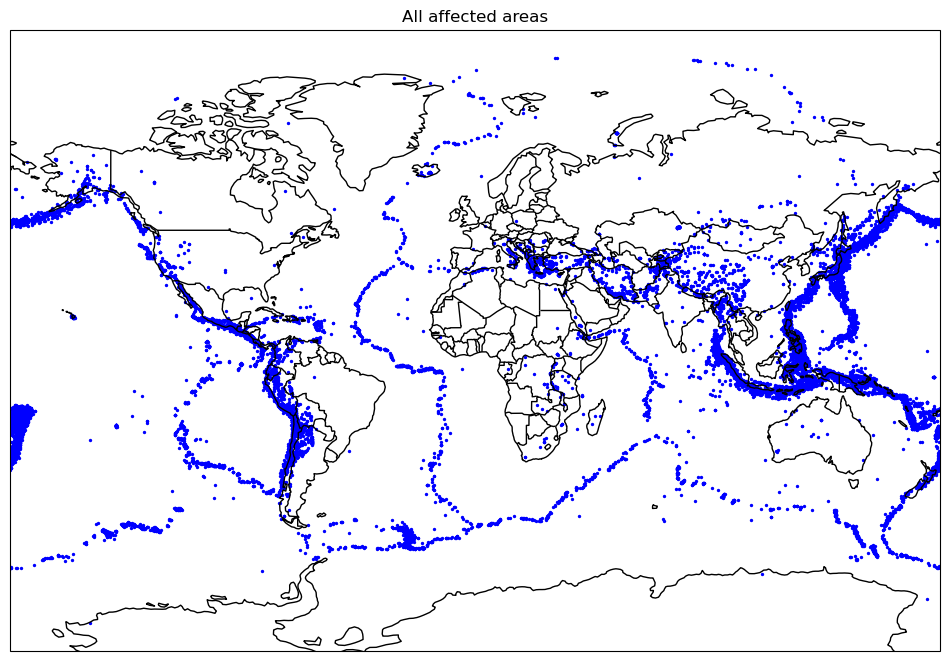

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming `data` is your DataFrame containing longitude and latitude columns
longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()

# Create a new figure
plt.figure(figsize=(12, 10))

# Define the map projection
projection = ccrs.Miller()

# Create a Cartopy map
ax = plt.axes(projection=projection)

# Plot the data points
ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree(), color='blue', s=2)

# Add coastlines and boundaries
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Show the plot
plt.title("All affected areas")
plt.show()


In [54]:
from sklearn.model_selection import train_test_split

X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17562, 3) (4391, 3) (17562, 2) (4391, 2)


In [55]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
from keras import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [57]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.5038455790406056, accuracy = 0.9241777017858995
